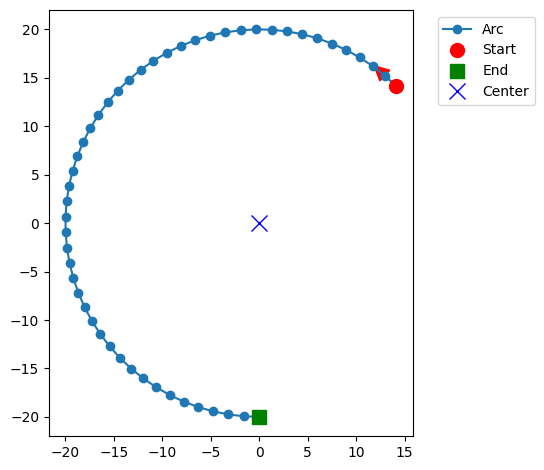

In [1]:
import ezdxf
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_arc_points(dxf_file, num_points=50):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    arcs_data = []

    for arc in msp.query("ARC"):
        center = arc.dxf.center
        radius = arc.dxf.radius
        start_angle = math.radians(arc.dxf.start_angle)
        end_angle = math.radians(arc.dxf.end_angle)

        # DXF ARC 始终逆时针，计算跨越角度
        span = (end_angle - start_angle) % (2 * math.pi)
        angles = start_angle + np.linspace(0, span, num_points)

        points = [(center.x + radius*math.cos(theta),
                   center.y + radius*math.sin(theta)) for theta in angles]

        start_point = points[0]
        end_point = points[-1]

        arcs_data.append({
            "center": (center.x, center.y),
            "radius": radius,
            "points": points,
            "start_point": start_point,
            "end_point": end_point,
            "direction": "CCW"  # 保存方向信息
        })

    return arcs_data


def visualize_arcs(arcs_data):
    fig, ax = plt.subplots()
    for arc in arcs_data:
        xs, ys = zip(*arc["points"])
        ax.plot(xs, ys, 'o-', label="Arc")

        # 起点标记：红色圆点
        ax.plot(arc["start_point"][0], arc["start_point"][1],
                'ro', markersize=10, label="Start")

        # 终点标记：绿色方块
        ax.plot(arc["end_point"][0], arc["end_point"][1],
                'gs', markersize=10, label="End")

        # 方向箭头（起点到第二个点）
        sx, sy = arc["start_point"]
        nx, ny = arc["points"][1]
        dx, dy = nx - sx, ny - sy
        ax.arrow(sx, sy, dx, dy,
                 head_width=1.5, head_length=1.5, fc='red', ec='red')

        # 圆心标记：蓝色十字
        cx, cy = arc["center"]
        ax.plot(cx, cy, 'bx', markersize=12, label="Center")

    ax.set_aspect('equal')
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


# 示例调用
arcs = extract_arc_points("../dxf/arc.dxf", num_points=50)
visualize_arcs(arcs)
